$\Large{\text{Clustering using K-Means}}$ 

Given data set $D=\{(x^i\}_{i=1}^{m}$ of points $x^i$, we wish to cluster these points into groups. The clustering should be done in such a way that the points belonging to the same group (or) cluster should be similar when compared to the points from other groups (or) clusters. 


Given the number of clusters $K$, the clustering is achieved by finding a partition $(C_1,C_2,\ldots,C_K) \subseteq D^K$, such that the following objective is optimized:

$
\begin{align}
\min_{(C_1,C_2,\ldots,C_K) \subseteq D^K} \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\frac{1}{|C_k|}\sum_{u \in C_k} u\|
\end{align}
$

This optimization algorithm can be equivalenty written as:
$
\begin{align}
\min_{(C_1,C_2,\ldots,C_K) \subseteq D^K} \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\mu^k\|
\end{align}
$
where $\mu^k = \frac{1}{|C_k|}\sum_{u \in C_k} u$. 

In general, solving this optimization problem is NP-hard. However an iterative technique called $K$-Means algorithm has been developed which can effectively cluster the points by finding a local optimum of the above optimization problem. 

The idea of the algorithm is as follows: 

*   Input: Data set $D=\{(x^i)\}_{i=1}^{m}$. 
*   Start with a random initialization of means $(\mu^1,\mu^2,\ldots,\mu^K)$ (usually identified from the data set itself).
*   Repeat:
      1. Construct partitions $(C_1,C_2,\ldots,C_K)$ such that $C_j$ contains points from $D$ which are closer to $\mu^j, \forall j\in\{1,2\ldots,K\}$.
      2. Recompute means $\mu^j = \frac{1}{|C_j|} \sum_{x \in C_j} x, \forall j\in \{1,2,\ldots,K}$. 

    Until partitions $(C_1,C_2,\ldots,C_K)$ do not change.




In [ ]:
#importing the required packages
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('s1.txt', sep='    ',index_col=None,header = None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5000 non-null   int64
 1   1       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [ ]:
print('shape of data:(', len(df.index), len(df.columns),')')

shape of data:( 5000 2 )


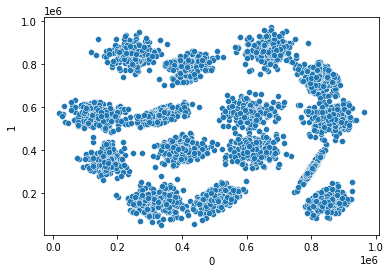

In [ ]:
import seaborn as sns
sns.scatterplot(x=df[0],y=df[1])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = df.to_numpy() 

In [ ]:
print('shape of data:', X.shape)

shape of data: (5000, 2)


In [ ]:
X

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]])

**Part 2 and 3**

For K=6

In [ ]:
km6 = KMeans(n_clusters=6, random_state=0)

In [ ]:
km6

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
km6_result = km6.fit(X)

In [ ]:
km6_result.labels_

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [ ]:
print(X[:,0].shape, X[:,1].shape, km6_result.labels_.shape)

(5000,) (5000,) (5000,)


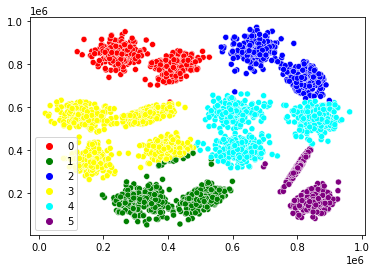

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km6_result.labels_, palette=['red','green','blue','yellow','cyan','purple'])

In [ ]:
km6_result.cluster_centers_

array([[327777.54878049, 818273.62804878],
       [416059.19127989, 173868.27144866],
       [743452.62407132, 799746.24368499],
       [258400.2994012 , 469397.88023952],
       [699998.49441624, 503919.08121827],
       [827515.9514867 , 236985.19248826]])

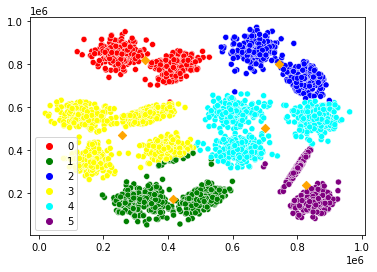

In [ ]:
#plot these centers in the cluster plot
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km6_result.labels_, palette=['red','green','blue','yellow','cyan','purple'])
plt.scatter(x=km6_result.cluster_centers_[:,0],y=km6_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=7

In [ ]:
km7 = KMeans(n_clusters=7, random_state=0)

In [ ]:
km7_result = km7.fit(X)

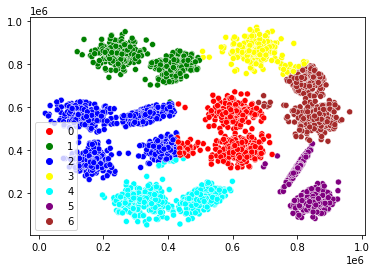

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km7_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown'])

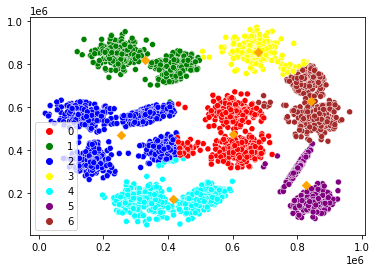

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=X[:,0],y=X[:,1],hue=km7_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown'])
plt.scatter(x=km7_result.cluster_centers_[:,0],y=km7_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=8

In [ ]:
km8 = KMeans(n_clusters=8, random_state=0)

In [ ]:
km8_result = km8.fit(X)

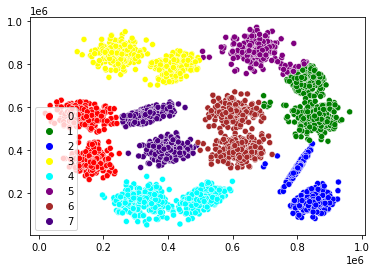

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km8_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo'])

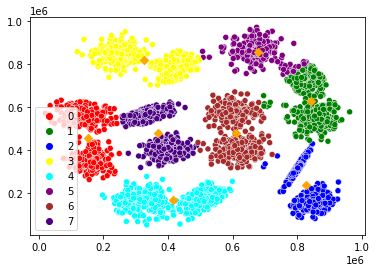

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=X[:,0],y=X[:,1],hue=km8_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo'])
plt.scatter(x=km8_result.cluster_centers_[:,0],y=km8_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=9

In [ ]:
km9 = KMeans(n_clusters=9, random_state=0)

In [ ]:
km9_result = km9.fit(X)

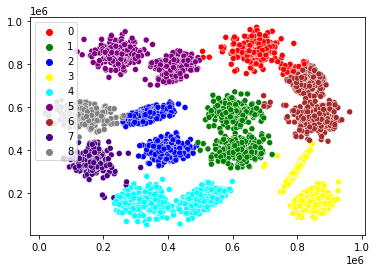

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km9_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray'])

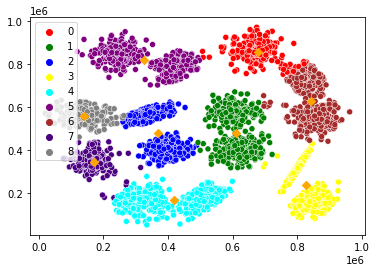

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=X[:,0],y=X[:,1],hue=km9_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray'])
plt.scatter(x=km9_result.cluster_centers_[:,0],y=km9_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=10

In [ ]:
km10 = KMeans(n_clusters=10, random_state=0)

In [ ]:
km10_result = km10.fit(X)

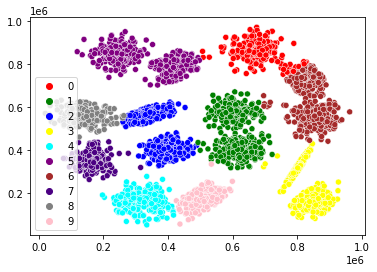

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km10_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink'])

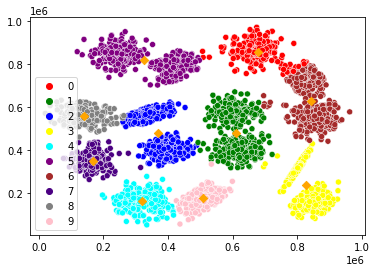

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=X[:,0],y=X[:,1],hue=km10_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink'])
plt.scatter(x=km10_result.cluster_centers_[:,0],y=km10_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=11

In [ ]:
km11 = KMeans(n_clusters=11, random_state=0)

In [ ]:
km11_result = km11.fit(X)

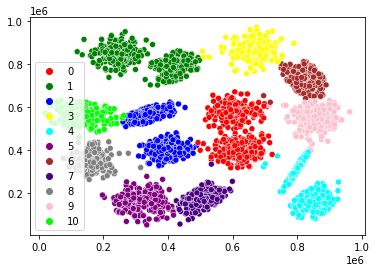

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km11_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime'])

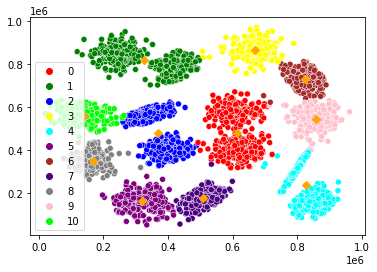

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=X[:,0],y=X[:,1],hue=km11_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime'])
plt.scatter(x=km11_result.cluster_centers_[:,0],y=km11_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=12

In [ ]:
km12 = KMeans(n_clusters=12, random_state=0)

In [ ]:
km12_result = km12.fit(X)

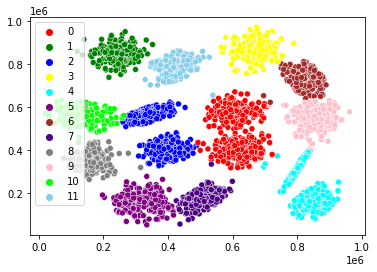

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km12_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue'])

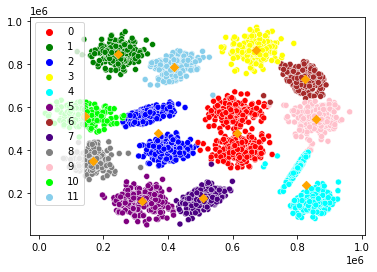

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=X[:,0],y=X[:,1],hue=km12_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue'])
plt.scatter(x=km12_result.cluster_centers_[:,0],y=km12_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=13

In [ ]:
km13 = KMeans(n_clusters=13, random_state=0)

In [ ]:
km13_result = km13.fit(X)

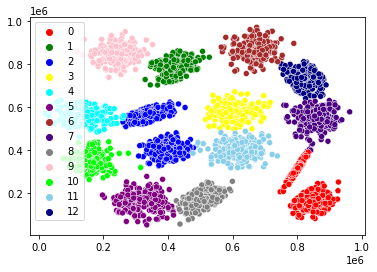

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km13_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue','navy'])

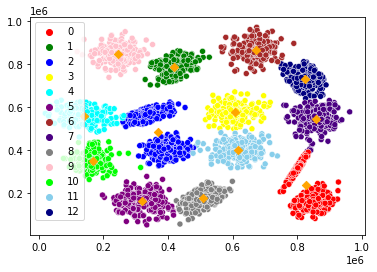

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=X[:,0],y=X[:,1],hue=km13_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue','navy'])
plt.scatter(x=km13_result.cluster_centers_[:,0],y=km13_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


**Part 4**

The clusters are becoming more symmetric about their respective centers.

**Part 5**

In [ ]:
t = pd.read_csv('test.txt', sep='    ',index_col=None,header = None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
test = t.to_numpy() 

In [ ]:
test

array([[175569, 306397],
       [ 89722, 122964],
       [699907, 596579],
       [800441, 630292],
       [302293, 467398],
       [211558, 285224],
       [610774, 300142],
       [850360, 467513]])

For K=6

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km6_result.predict(test)

array([3, 1, 4, 4, 3, 3, 4, 4], dtype=int32)

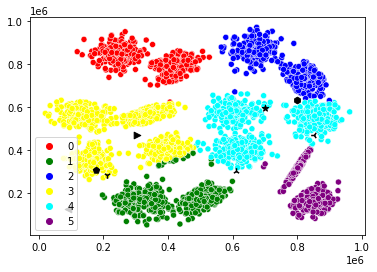

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km6_result.labels_, palette=['red','green','blue','yellow','cyan','purple'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


For K=7

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km7_result.predict(test)

array([2, 4, 6, 6, 2, 2, 0, 6], dtype=int32)

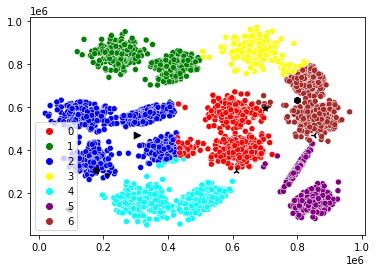

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km7_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


For K=8

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km8_result.predict(test)

array([0, 4, 1, 1, 7, 0, 6, 1], dtype=int32)

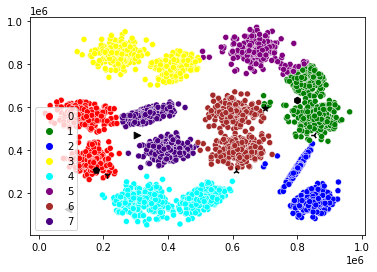

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km8_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


For K=9

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km9_result.predict(test)

array([7, 7, 1, 6, 2, 7, 1, 6], dtype=int32)

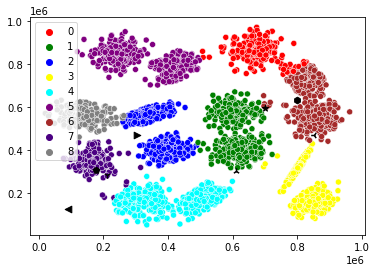

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km9_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


For K=10

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km10_result.predict(test)

array([7, 4, 1, 6, 2, 7, 9, 6], dtype=int32)

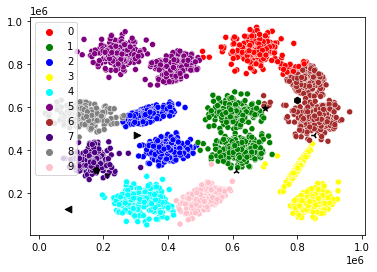

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km10_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


For K=11

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km11_result.predict(test)

array([8, 5, 0, 6, 2, 8, 7, 9], dtype=int32)

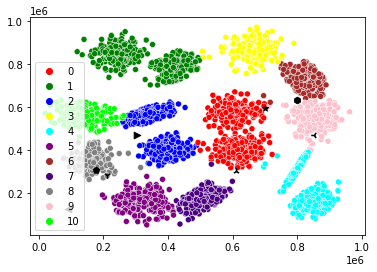

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km11_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


For K=12

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km12_result.predict(test)

array([8, 5, 0, 6, 2, 8, 7, 9], dtype=int32)

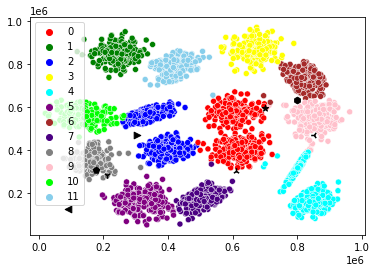

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km12_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


For K=13

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km13_result.predict(test)

array([10,  5,  3, 12,  2, 10, 11,  7], dtype=int32)

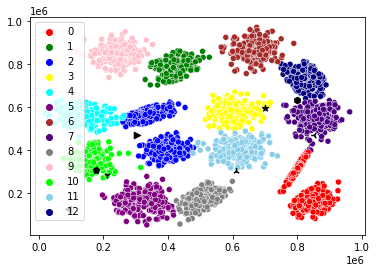

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km13_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue','navy'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test)):
  plt.scatter(x=test[j,0],y=test[j,1],color='black',marker=markers[j], s=44)


**Part 6**

The prediction is not very accurate for some value of K.

**Part 7**

We can use 'elbow method' to get optimal value of K. The idea of this method is that it plots values of cost for different values of K. Since, as the K increases the average distortion decreases. So, the K at which distortion declines most or we can say where we get elbow like shape is considered as optimal.

**Part 8**

<function matplotlib.pyplot.show>

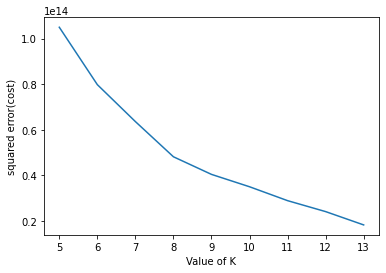

In [ ]:
cost=[]
for i in range(5,14):
  KM=KMeans(n_clusters=i)
  KM.fit(X) 
  cost.append(KM.inertia_) #it calculates squared error(cost) corrs. to K
plt.plot(range(5,14),cost)
plt.xlabel('Value of K')
plt.ylabel('squared error(cost)')
plt.show

8 is the best no. of choice for K according to elbow method. 

**Part 10**

In [ ]:
df_norm = df.copy()
df_norm = df_norm.astype(float)
for i in range(len(df[0])):
  df_norm[0][i] = (df_norm[0][i]-df[0].mean())/df[0].std()

for i in range(len(df[1])):
  df_norm[1][i] = (df_norm[1][i]-df[1].mean())/df[1].std()

In [ ]:
df_norm.head()

0         1
0  0.610398  0.238452
1  0.617294  0.268214
2  0.336388  0.342726
3  0.424036  0.240572
4  0.493944  0.480564

In [ ]:
df_norm.tail()

0         1
4995  0.615581  1.523191
4996  0.723575  1.565690
4997  0.555184  1.554259
4998  0.346508  1.543383
4999  0.691931  1.474964

**Part 11 and 12**

In [ ]:
Y=df_norm.to_numpy()

For K=5

In [ ]:
km5 = KMeans(n_clusters=5, random_state=0)
km5_result = km5.fit(Y)

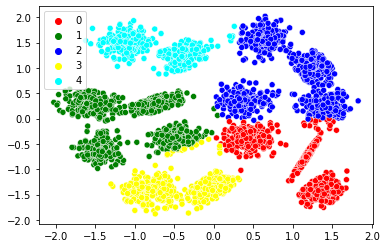

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km5_result.labels_, palette=['red','green','blue','yellow','cyan'])

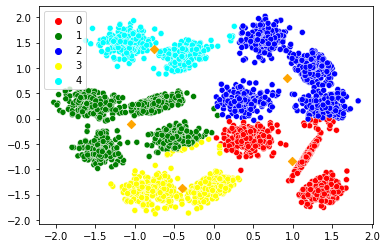

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km5_result.labels_, palette=['red','green','blue','yellow','cyan'])
plt.scatter(x=km5_result.cluster_centers_[:,0],y=km5_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=6

In [ ]:
km6 = KMeans(n_clusters=6, random_state=0)
km6_result = km6.fit(Y)

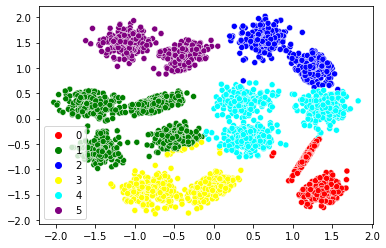

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km6_result.labels_, palette=['red','green','blue','yellow','cyan','purple'])

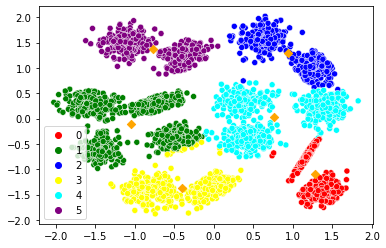

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km6_result.labels_, palette=['red','green','blue','yellow','cyan','purple'])
plt.scatter(x=km6_result.cluster_centers_[:,0],y=km6_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=7

In [ ]:
km7 = KMeans(n_clusters=7, random_state=0)
km7_result = km7.fit(Y)

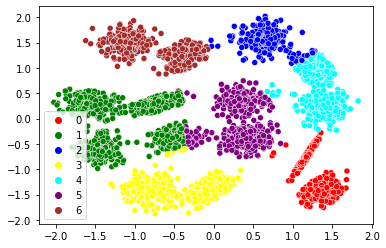

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km7_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown'])

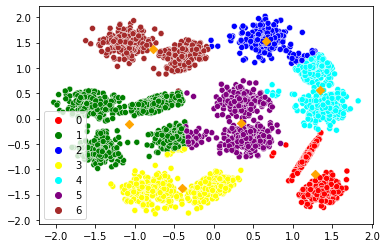

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km7_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown'])
plt.scatter(x=km7_result.cluster_centers_[:,0],y=km7_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=8

In [ ]:
km8 = KMeans(n_clusters=8, random_state=0)
km8_result = km8.fit(Y)

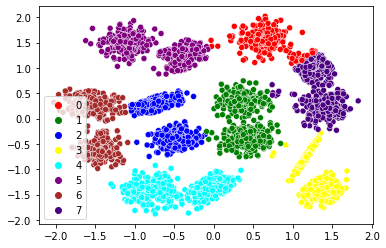

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km8_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo'])

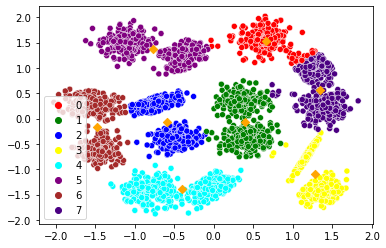

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km8_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo'])
plt.scatter(x=km8_result.cluster_centers_[:,0],y=km8_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=9

In [ ]:
km9 = KMeans(n_clusters=9, random_state=0)
km9_result = km9.fit(Y)

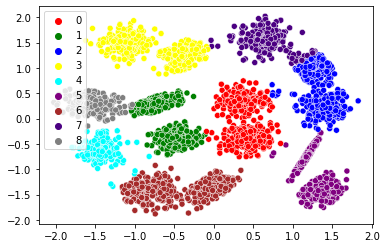

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km9_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray'])

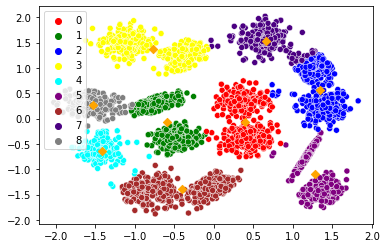

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km9_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray'])
plt.scatter(x=km9_result.cluster_centers_[:,0],y=km9_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=10

In [ ]:
km10 = KMeans(n_clusters=10, random_state=0)
km10_result = km10.fit(Y)

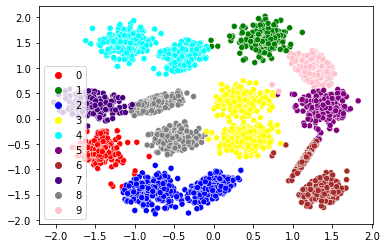

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km10_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink'])

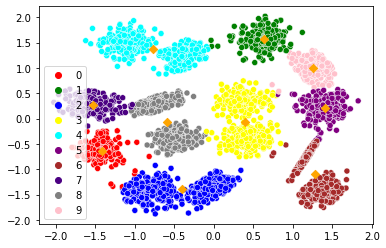

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km10_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink'])
plt.scatter(x=km10_result.cluster_centers_[:,0],y=km10_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=11

In [ ]:
km11 = KMeans(n_clusters=11, random_state=0)
km11_result = km11.fit(Y)

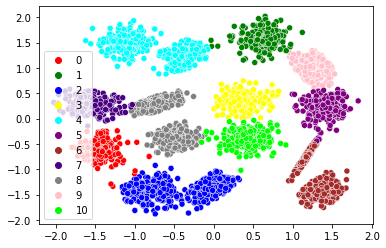

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km11_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime'])

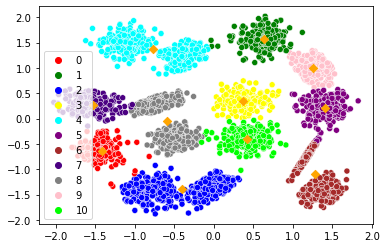

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km11_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime'])
plt.scatter(x=km11_result.cluster_centers_[:,0],y=km11_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=12

In [ ]:
km12 = KMeans(n_clusters=12, random_state=0)
km12_result = km12.fit(Y)

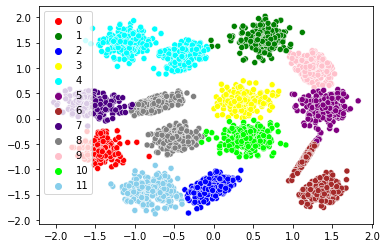

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km12_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue'])

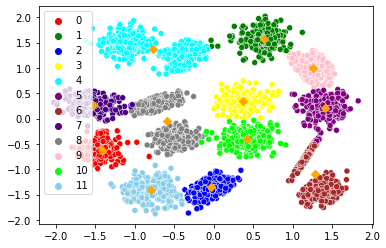

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km12_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue'])
plt.scatter(x=km12_result.cluster_centers_[:,0],y=km12_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


For K=13

In [ ]:
km13 = KMeans(n_clusters=13, random_state=0)
km13_result = km13.fit(Y)

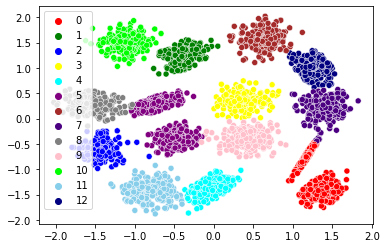

In [ ]:
 sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km13_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue','navy'])

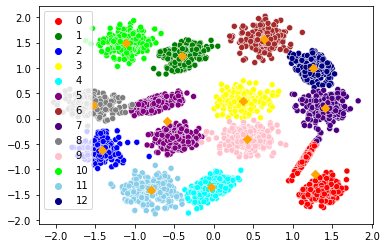

In [ ]:
#plot these centers in the cluster plot

sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km13_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue','navy'])
plt.scatter(x=km13_result.cluster_centers_[:,0],y=km13_result.cluster_centers_[:,1],color='orange',marker="D", s=34)


**Part 13**

Symmetry increases or distortion decreases of each clusters with respect to their center.

**Part 14**

We will use the same way by which we changed s1.txt using mean and standard deviation of corresponding column of df.

In [ ]:
t_norm = t.copy()
t_norm = t_norm.astype(float)
for i in range(len(t[0])):
  t_norm[0][i] = (t_norm[0][i]-df[0].mean())/df[0].std()

for i in range(len(t[1])):
  t_norm[1][i] = (t_norm[1][i]-df[1].mean())/df[1].std()

In [ ]:
test_norm = t_norm.to_numpy()

In [ ]:
test_norm

array([[-1.38820406, -0.7984719 ],
       [-1.7393655 , -1.57625487],
       [ 0.75662676,  0.43194258],
       [ 1.16786612,  0.57489068],
       [-0.8698332 , -0.11580391],
       [-1.24098925, -0.88824854],
       [ 0.39202377, -0.82499402],
       [ 1.37206228, -0.11531629]])

For K=6

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km6_result.predict(test_norm)

array([1, 3, 4, 4, 1, 1, 0, 4], dtype=int32)

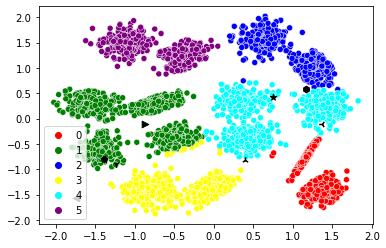

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km6_result.labels_, palette=['red','green','blue','yellow','cyan','purple'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


For K=7

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km7_result.predict(test_norm)

array([1, 3, 4, 4, 1, 1, 5, 4], dtype=int32)

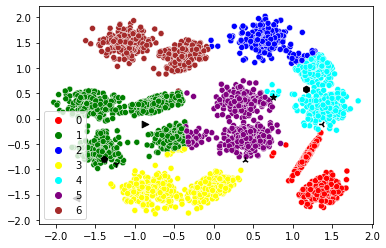

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km7_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


For K=8

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km8_result.predict(test_norm)

array([6, 4, 7, 7, 2, 6, 1, 7], dtype=int32)

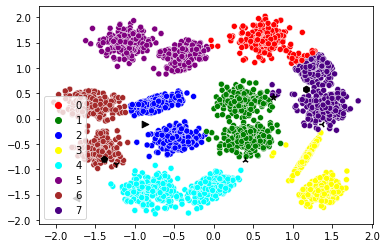

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km8_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


For K=9

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km9_result.predict(test_norm)

array([4, 4, 2, 2, 1, 4, 0, 2], dtype=int32)

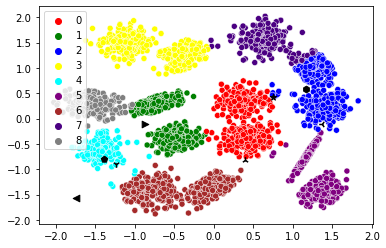

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km9_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


For K=10

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km10_result.predict(test_norm)

array([0, 0, 3, 9, 8, 0, 3, 5], dtype=int32)

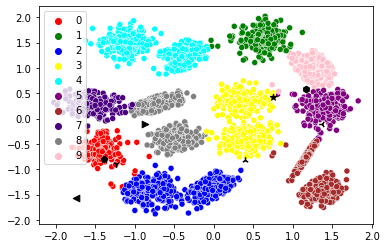

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km10_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


For K=11

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km11_result.predict(test_norm)

array([ 0,  0,  3,  9,  8,  0, 10,  5], dtype=int32)

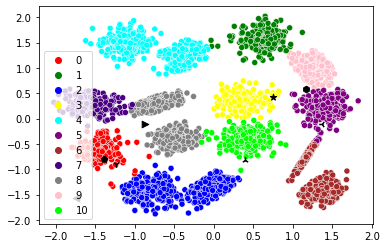

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km11_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


For K=12

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km12_result.predict(test_norm)

array([ 0, 11,  3,  9,  8,  0, 10,  5], dtype=int32)

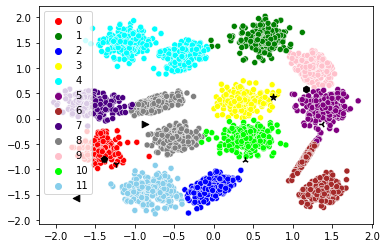

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km12_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


For K=13

In [ ]:
#the prediction is represented by the following array in which the ith element denote the predicted cluster(refer the the scatter plot for cluster no. to color map) of the ith element of test.txt 
km13_result.predict(test_norm)

array([ 2, 11,  3, 12,  5,  2,  9,  7], dtype=int32)

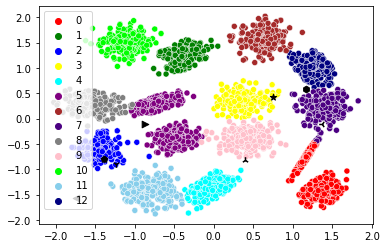

In [ ]:
sns.scatterplot(x=Y[:,0],y=Y[:,1],hue=km13_result.labels_, palette=['red','green','blue','yellow','cyan','purple','brown','indigo','gray','pink','lime','skyblue','navy'])

markers=["p","<","*","h",">","1","2","3"]
for j in range(len(test_norm)):
  plt.scatter(x=test_norm[j,0],y=test_norm[j,1],color='black',marker=markers[j], s=44)


**Part 15**

Prediction are better than before.

**Part 16**

<function matplotlib.pyplot.show>

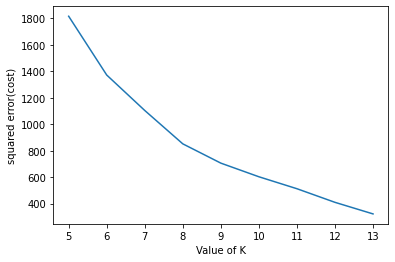

In [ ]:
cost2=[]
for i in range(5,14):
  KM2=KMeans(n_clusters=i)
  KM2.fit(Y) 
  cost2.append(KM2.inertia_) #it calculates squared error(cost) corrs. to K
plt.plot(range(5,14),cost2)
plt.xlabel('Value of K')
plt.ylabel('squared error(cost)')
plt.show

8 is best choice for K

**Part 17**

without normalization we are not getting good clustering while after normalizing we got better shaped and more optimal clusters.

**Part 18**

predictions were better when normalized data was used.

**Part 19**

Normalizing the data is useful especially when there are different type( with diff. units) of values in the data set